<a href="https://colab.research.google.com/github/Maplemx/Agently/blob/main/playground/predict_data_according_given_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Data according Given Data Set

## Demo Description

**Author:** Agently Team

**Prompt Language:** English

**Agent Components:** None

**Description:**

As we know, LLMs are based on transformer algorithm, which predict next token according all tokens in context no matter they were given by input or generated during the output process. So we have a wondering about can LLM predict new data pairs according given data set?

Here's the experiment we designed to compare the performance of GPT-3.5-turbo-1106 and Gemini Pro in predicting data pairs using Agently framework. (Of course you can try other models by changing settings)

我们知道，语言模型基于transformer算法，这种算法会根据上下文给出的信息去推断下一个token，这里所说的上下文既包括原始输入的内容，也包括在输出过程中产生的内容。这样的概率计算过程，让我不禁好奇，它能不能对具有一定模式的数据集里的数据对进行预测呢？

于是我们设计了下面这个试验，来比较GPT-3.5-turbo-1106和Gemini-Pro在数据对预测上的能力。当然，因为使用Agently框架进行支持，这个过程非常简单，你也可以通过修改Agently设置，去快速切换和试验更多其他模型。

## Step 0. Install Agently Package


In [ ]:
!pip install -U -q Agently

## Step 1. Prepare Data Set

At the first Step, we generated a data set of quadratic equations with noise interference using random numbers.

首先，我们随机生成一个带有噪音干扰的一元二次方程数据集。

In [ ]:
# Prepare Data Set
import numpy as np

# y = w1 * x^2 + w2 * x + b + noise
num = 20
w1 = 2.5
w2 = 3.4
b = 5.2
x_range = (-30.0, 30.0)
noise_range = (-1, 1)
def generate_data_set(num, w1, w2, b, x_range, noise_range):
    data_set = []
    for _ in range(num):
        x = np.random.normal(x_range[0], x_range[1])
        noise = np.random.normal(noise_range[0], noise_range[1])
        y = pow(x, 2) * w1 + x * w2 + b + noise
        data_set.append([round(x, 3), round(y, 3)])
    return data_set

data_set = generate_data_set(num, w1, w2, b, x_range, noise_range)
print(data_set)

[[-35.532, 3038.298], [-17.121, 680.106], [8.396, 208.122], [3.274, 42.058], [-26.864, 1716.939], [13.493, 504.117], [-83.563, 17176.494], [-32.002, 2455.563], [-40.589, 3985.282], [-100.041, 24683.111], [-7.932, 133.835], [-7.828, 129.65], [-42.116, 4294.806], [0.536, 7.818], [-49.47, 5954.044], [-23.008, 1250.231], [-54.995, 7377.244], [-37.655, 3422.295], [-14.601, 487.485], [-9.397, 194.43]]


## Step 2. GPT-3.5-turbo-1106 Test

### 2.1 Create Agent

In [ ]:
import Agently

agent_factory = (
    Agently.AgentFactory()
        .set_settings("model.OpenAI.auth.api_key", "")
        .set_settings("model.OpenAI.options", { "model": "gpt-3.5-turbo-1106" })
)

agent = agent_factory.create_agent()

### 2.2 Generate Prediction

In [ ]:
# Predict
result = (
    agent
        .input({ "data_set": data_set })
        .output({
            "prediction": (
                [("list", "number pair.")],
                "predict 10 OTHER possible number pairs according {input.data_set}'s pattern"
            )
        })
        .start()
)
prediction = result["prediction"]
print(prediction)

[[-100.678, 25619.105], [-93.259, 18604.163], [-61.356, 7839.939], [-50.907, 8209.86], [-47.112, 4709.604], [-20.681, 1956.488], [-5.439, 90.569], [10.658, 669.728], [24.538, 1457.046], [54.731, 9167.92]]


### 2.3 Draw Plot

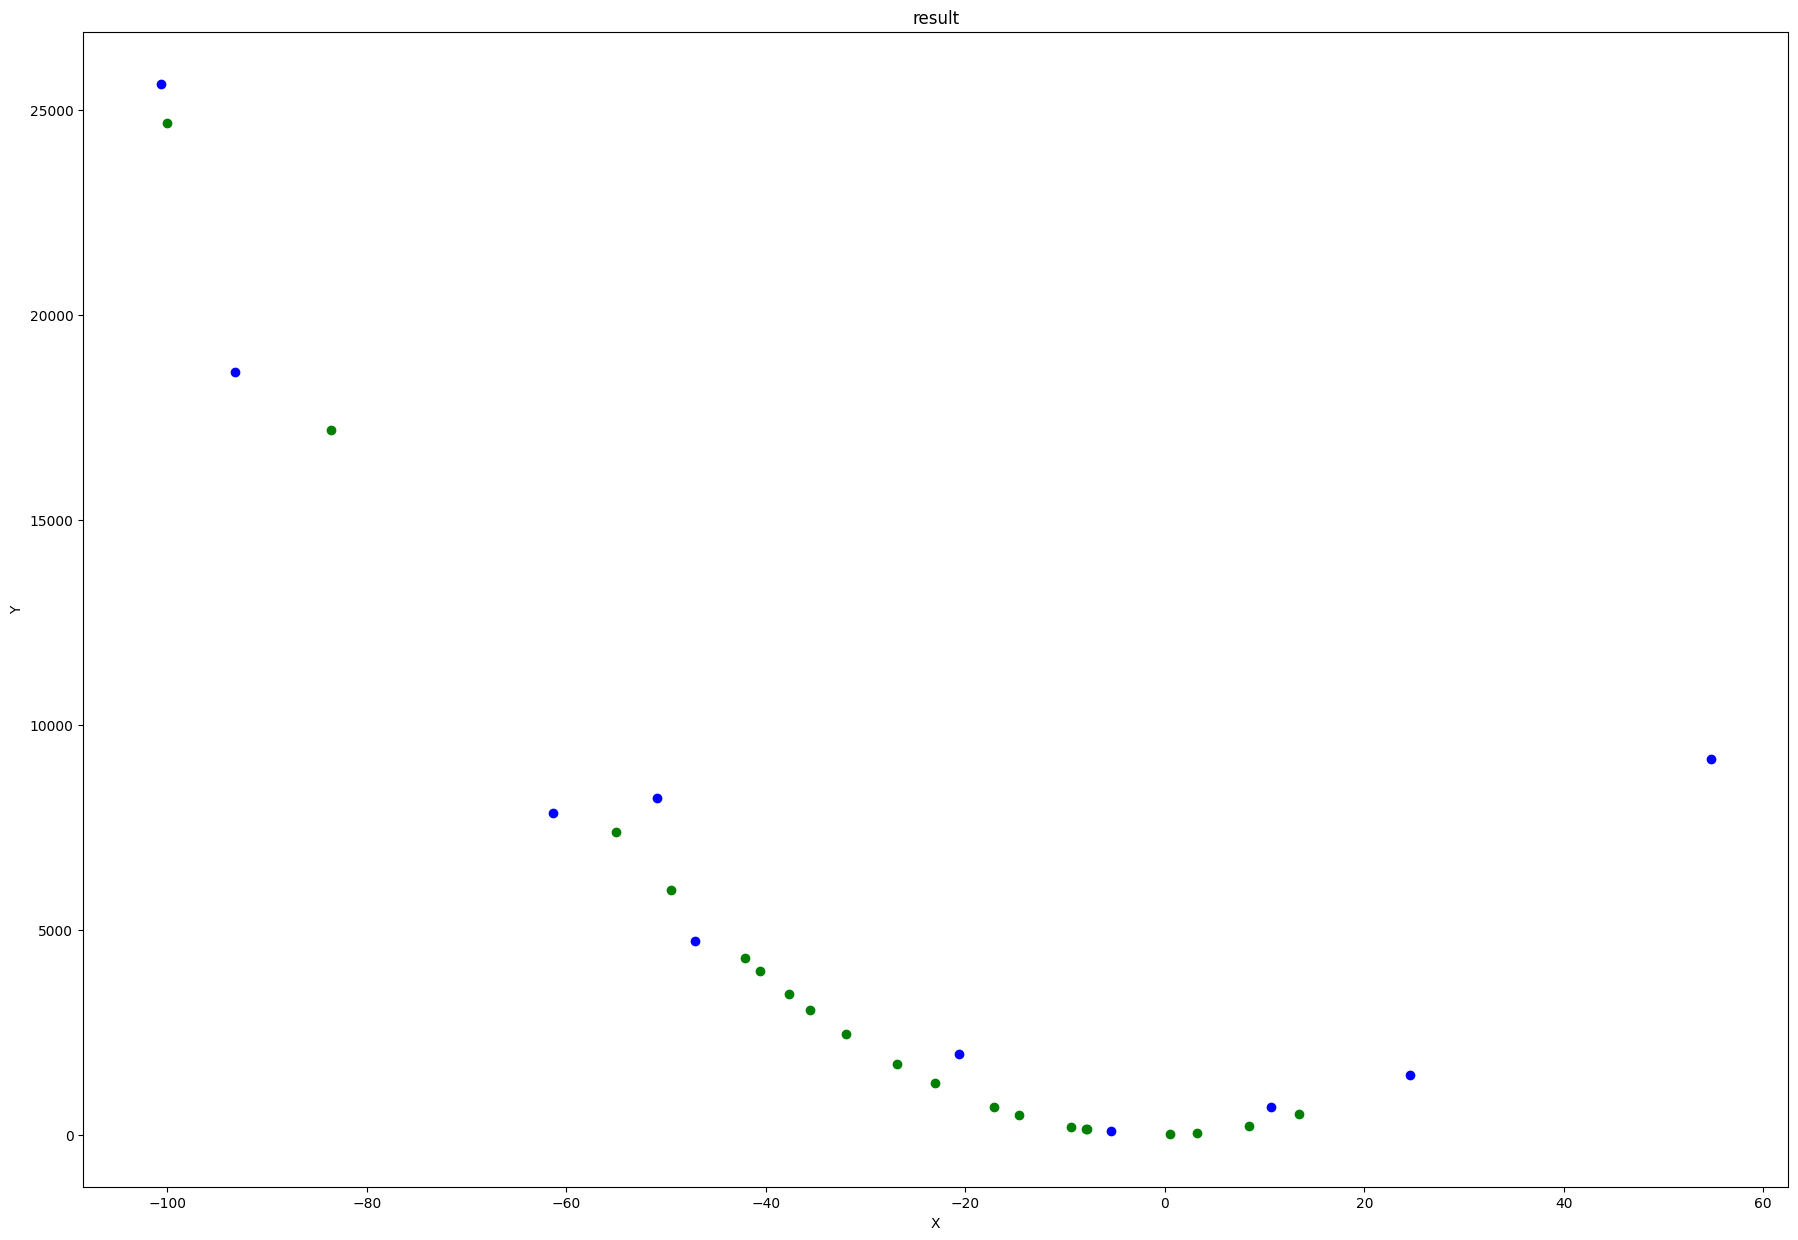

In [ ]:
# Draw
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 15))
plt.title("result")
plt.xlabel("X")
plt.ylabel("Y")
data_set_x, data_set_y = zip(*data_set)
plt.scatter(data_set_x, data_set_y, c="green")
pred_x, pred_y = zip(*prediction)
plt.scatter(pred_x, pred_y, c="blue")
plt.show()

### 2.4 Explain Patterns

In [ ]:
# Explain Pattern
result = (
    agent
        .input({
            "origin_data_set": data_set,
            "your_prediction": prediction,
        })
        .output({
            "patterns": ("String", "Explain patterns you discovered from {origin_data_set}")
        })
        .start()
)
print("[Patterns]", result["patterns"])

[Patterns] The origin_data_set shows a negative correlation between the first and second values, with the second value increasing as the first value decreases.


## Step 3. Gemini Pro Test

### 3.1 Create Agent

In [ ]:
import Agently

agent_factory = (
    Agently.AgentFactory()
        .set_settings("current_model", "Google")
        .set_settings("model.Google.auth.api_key", "")
)

agent = agent_factory.create_agent()

### 3.2 Generate Prediction

In [ ]:
# Predict
result = (
    agent
        .input({ "data_set": data_set })
        .output({
            "prediction": (
                [("list", "number pair.")],
                "predict 10 OTHER possible number pairs according {input.data_set}'s pattern"
            )
        })
        .start()
)
prediction = result["prediction"]
print(prediction)

[[-2.608, 29.023], [-29.07, 1995.173], [-57.224, 8008.143], [-45.604, 5146.876], [-75.811, 13371.15], [-14.295, 465.285], [-1.021, 10.873], [-3.746, 47.945], [-52.155, 6542.789], [-86.795, 18427.52]]


### 3.3 Draw Plot

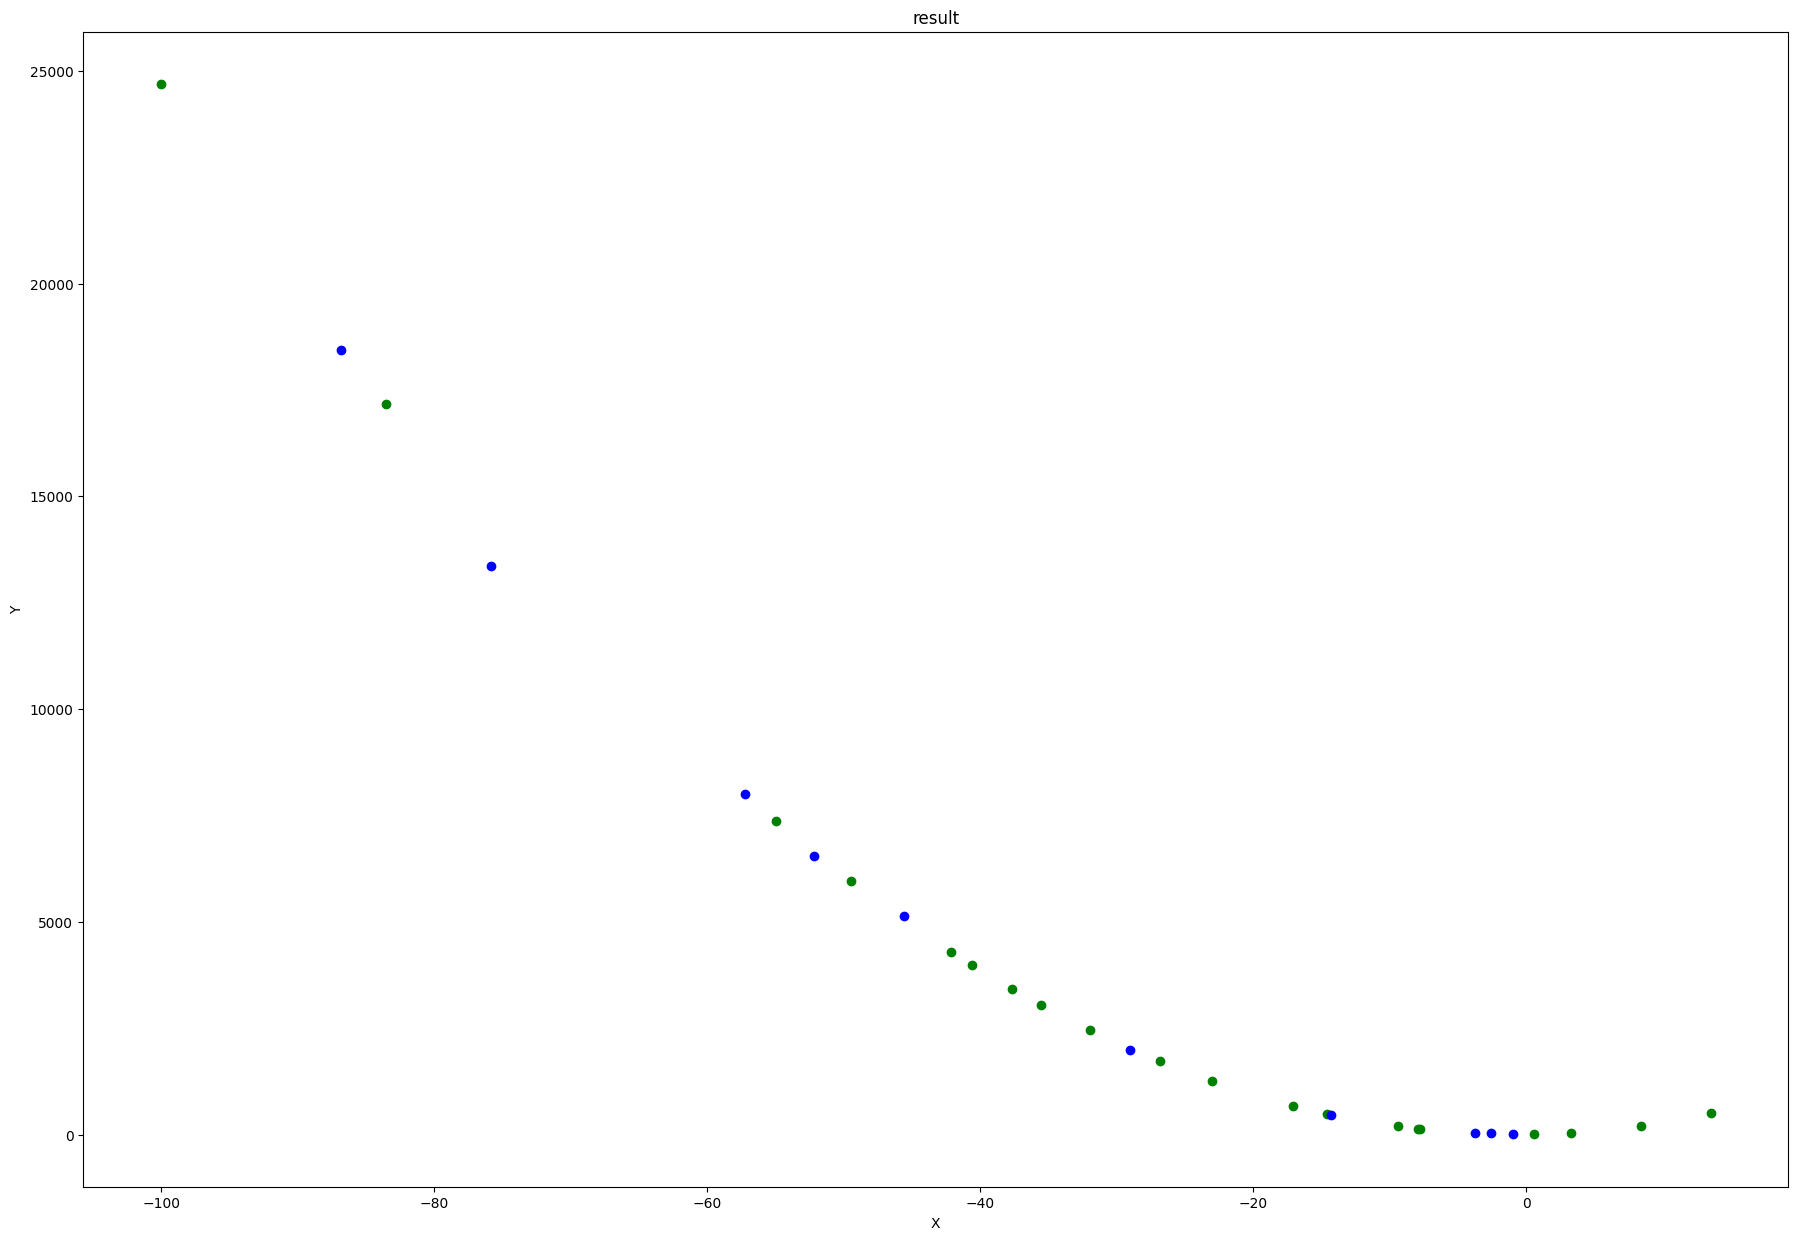

In [ ]:
# Draw
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 15))
plt.title("result")
plt.xlabel("X")
plt.ylabel("Y")
data_set_x, data_set_y = zip(*data_set)
plt.scatter(data_set_x, data_set_y, c="green")
pred_x, pred_y = zip(*prediction)
plt.scatter(pred_x, pred_y, c="blue")
plt.show()

### 3.4 Explain Patterns

In [ ]:
# Explain Pattern
result = (
    agent
        .input({
            "origin_data_set": data_set,
            "your_prediction": prediction,
        })
        .output({
            "patterns": ("String", "Explain patterns you discovered from {origin_data_set}")
        })
        .start()
)
print("[Patterns]", result["patterns"])

[Patterns] There is a linear relationship between the two variables, with a positive correlation. The data points are clustered around a line, and the slope of the line is approximately -0.007.


## Conclusion

Both LLMs can generate new data pairs according the given data set.

GPT-3.5-turbo-1106 can consider about the data of a quadratic function should initially decreasing and then increasing. Gemini Pro also shows its considerations about the changes in slope.

But when we try to let the models explain the patterns, they both got wrong or simply explain it as a linear relationship.

It's not a rigorous experiment as we didn't try many times and record all the results. But maybe this show case can present some ability demos about LLMs and offering some insights.

结论：

1. 两个模型都能够根据给定的数据集生成一定程度上符合要求的新数据对，GPT-3.5-turbo-1106考虑到了二次函数先降后升的特性，Gemini Pro的预测数据里也看到了对斜率变化的考虑；

2. 但是，当我们尝试让模型解释自己的发现的模式时，模型又只会简单地解释数据增减性上的简单关系，或是认为数据之间只有简单的线性关系，这和实际给出的数据预测结果是不一致的；

3. 所以有可能从统计学、概率角度，模型能够从概率上给出符合某些模式的预测数据，但是它并不太能给出相应的可解释的原因。

当然，这并不是一个严谨的试验，我们没有进行很多次重复试验并记录每一次的结果进行对比。只是希望用这样的一个演示给大家带来一些有意思的现象记录。